# Superparamagnetic clustering
We implement a clustering method based on the Potts model 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics.pairwise import euclidean_distances

In [2]:
x,label=load_iris(True)
print(x.shape,label.shape)

(150, 4) (150,)


In [3]:
#Distances between the elements 
#Element i-j: distance between the element i and j
dist=euclidean_distances(x)

In [50]:
#Set the number of neighbors and the list of the closed ones
# np.argsort create an array of the argument with lower value of the distances

K=5
N=dist.shape[0]
nodenext=[]
Rank=np.argsort(dist)[:,1:K+1]
for i in range(N):
        e=[]
        for j in Rank[i]:
            if i in Rank[j]:
                e.append(j)
        nodenext.append(e.copy())
nodenext
print(len(nodenext))

150


In [53]:
# Evaluation of the parameter of the Hamiltonian 
#The mean value of the closed ones and the average nearest neighbors distance

khat = 0
for i in nodenext:
    khat+= len(i)
khat = khat / N


a = 0
for i in range(N):
    a+=sum(dist[i,nodenext[i]])
a = 4 * a / (khat*N)

J = (1 / khat) * np.exp(- ( dist / a/2)**2)
J.shape

(150, 150)

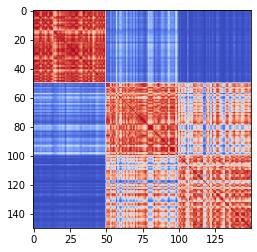

In [56]:
plt.imshow(J,'coolwarm')

In [10]:
#Assignment of the spins in a random way 

sp=np.random.randint(20,size=dist.shape[0])
sp

array([ 8, 11,  9, 12,  5,  5,  3, 18,  4, 11,  9, 15,  8, 11,  1,  2, 13,
       11,  4,  5, 15,  2,  5,  1, 15,  9, 19, 15,  6, 13,  7,  0,  8, 16,
        6,  2, 18,  0,  0, 16, 16,  9, 12, 15, 17,  7, 14,  6, 17,  6,  6,
       13, 19, 14,  2, 10,  6,  1,  6,  6, 12,  1, 10, 13, 13,  1, 10, 11,
       12, 10, 17, 14,  4, 15,  2,  7,  8, 17, 19, 13, 16, 12,  4, 15,  4,
       18,  8, 10, 15,  7, 14,  7, 15, 14,  8, 13,  0,  2, 15, 12, 14, 18,
        3,  0, 15,  0, 19, 13,  0,  2,  9, 19,  4,  8, 12, 13, 19, 10,  6,
        2,  9, 19,  2,  9,  5,  3, 15, 19,  0, 14, 15, 17,  5,  4, 12, 14,
        2,  6,  1, 19,  6,  3, 19,  6,  0,  1,  5,  6, 14, 11])

In [62]:
#Creation of the cluster list
"""
For the creation of the cluster we will create a list with all the elemnts.
In recurrent way we will upgrade the list untill all the elements are 
in one cluster.

"""
def new_advance(i,i_c,nei,sp,J,T):
  l=[]
  for n in nei[i]:
    if i_c[n]==0 and sp[i]==sp[n] and np.random.uniform()<1-np.exp(-*J[i,n]/T):
      l.append(n)
      i_c[n]=i_c[i]
  if l:
    for l_n in l:
      new_advance(l_n,i_c,nei,sp,J,T)

def create_cluster(T,nei,N,sp,J):
  i_c=np.zeros(N)
  i=0
  k=0
  while True:
    while i_c[i]!=0:
      i+=1
    k+=1
    i_c[i]=k
    new_advance(i,i_c,nei,sp,J,T)
    if np.all(i_c!=0):
      break

  cl=[]
  g=np.arange(N)
  for k in np.unique(i_c):
    cl.append(list(g[i_c==k].copy()))
  return cl.copy()

SyntaxError: ignored

In [63]:
cl=create_cluster(0.001,nodenext,N,sp,J)
cl

[[0],
 [1, 9],
 [2],
 [3],
 [4],
 [5],
 [6],
 [7],
 [8],
 [10],
 [11, 24],
 [12],
 [13],
 [14],
 [15],
 [16],
 [17],
 [18],
 [19],
 [20],
 [21],
 [22],
 [23],
 [25],
 [26],
 [27],
 [28],
 [29],
 [30],
 [31],
 [32],
 [33],
 [34],
 [35],
 [36],
 [37],
 [38],
 [39],
 [40],
 [41],
 [42],
 [43],
 [44],
 [45],
 [46],
 [47],
 [48],
 [49],
 [50],
 [51],
 [52],
 [53],
 [54, 74, 97],
 [55, 66],
 [56],
 [57],
 [58],
 [59],
 [60],
 [61],
 [62],
 [63],
 [64, 79],
 [65],
 [67],
 [68],
 [69],
 [70],
 [71],
 [72, 133],
 [73],
 [75],
 [76],
 [77],
 [78],
 [80],
 [81],
 [82],
 [83],
 [84],
 [85],
 [86],
 [87],
 [88],
 [89],
 [90],
 [91],
 [92],
 [93],
 [94],
 [95],
 [96],
 [98],
 [99],
 [100],
 [101],
 [102, 125],
 [103, 128],
 [104],
 [105],
 [106],
 [107],
 [108],
 [109],
 [110],
 [111, 116],
 [112],
 [113],
 [114],
 [115],
 [117],
 [118],
 [119],
 [120],
 [121, 142],
 [122],
 [123],
 [124],
 [126],
 [127],
 [129],
 [130],
 [131],
 [132],
 [134],
 [135],
 [136],
 [137],
 [138],
 [139],
 [140, 143],
 [

In [102]:
#Magnetization
def mag_pot(S,q):
    n_m=np.amax(np.bincount(S))
    return (n_m/N*q-1)/(q-1)

In [115]:
print(mag_pot(sp,20),np.bincount(sp),sp.shape[-1],sum(np.bincount(sp)))



0.03859649122807018 [ 9  7 10  4  7  7 13  5  7  7  6  6  8  9  9 13  4  5  4 10] 150 150


In [ ]:
def

In [184]:
def energy(sp,J):
  E=0
  for i in range(N):
    for j in nodenext[i]:
      if sp[i]!=sp[j]:
        E -= J[i, j]
  return E/N

In [185]:
q=20.
sp=np.random.randint(int(q),size=N)
spc=sp.copy()
tem=0
m=[]
Te=800
e=energy(sp,J)
for t in range(Te):
    cl=create_cluster(T,nodenext,N,sp,J)

    r=np.random.randint(len(cl))
    spc[cl[r]]=np.random.randint(q)
    ep=energy(spc,J)

    if e>ep or np.random.random()<np.exp(-(ep-e)/T):
      sp=spc.copy()
    else:
      spc=sp.copy()

    if t>300:
      tem=mag_pot(sp,q)
      m.append(tem)
      #m_2+=tem**2

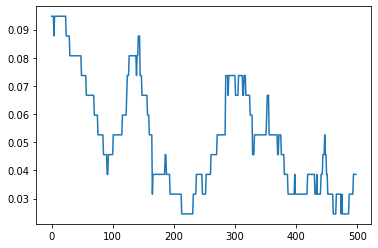

In [186]:
plt.plot(m)

In [187]:
def simu_pot(T,Te=400,q=20.):
    sp=np.random.randint(int(q),size=N)
    e=energy(sp,J)
    em=0
    tem=0
    m=0
    m_2=0
    ts=300
    spc=sp.copy()

    for t in range(Te):
        cl=create_cluster(T,nodenext,N,sp,J)

        r=np.random.randint(len(cl))

        spc[cl[r]]=np.random.randint(q)
        ep=energy(spc,J)

        if e>ep or np.random.random()<np.exp((ep-e)/T):
          sp=spc.copy()
          e=ep
        
        else:
          spc=sp.copy()

        if t>ts:
          em+=e
          tem=mag_pot(sp,q)
          m+=tem/(Te-ts)
          m_2+=tem**2/(Te-ts)

    return m,m_2-m**2

In [188]:
Tem=np.linspace(0.001,1.,50)

results=[]
for T in Tem:
    results.append(simu_pot(T,500,20.0))
results=np.asarray(results)

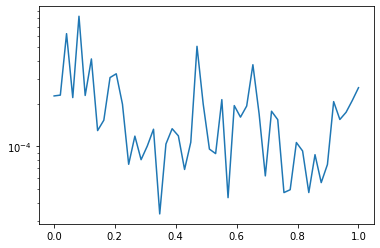

In [192]:
#fig,ax=plt.subplots(2,1)
plt.plot(Tem,results[:,1],'-')
#plt.xscale('log')
plt.yscale('log')
#ax[1].plot(Tem,results[:,0],'.')
#ax[0].set_yscale('log')

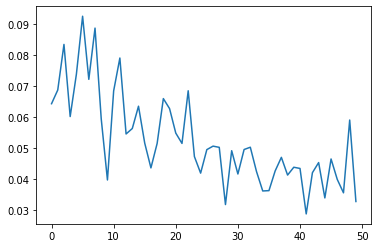

In [182]:
plt.plot(results[:,0])